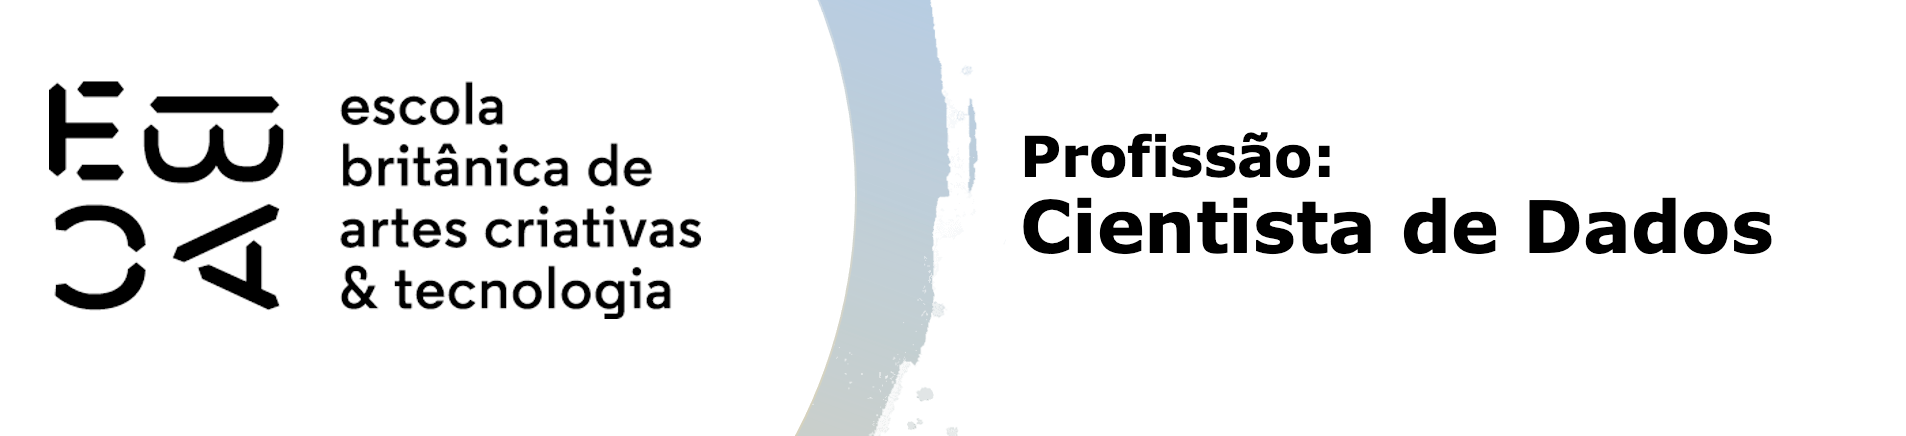

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

In [7]:
variaveis = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

**Valido se tem dados nulos**

Não tem dados nulos em nenhuma das variáveis

In [12]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Análiso o tipo das variáveis**

Todas numéricas, int ou float

In [14]:
df[variaveis].dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
dtype: object

**Padronizo os dados**

In [38]:
padronizador = StandardScaler()

x_pad = pd.DataFrame(padronizador.fit_transform(df[variaveis]), columns=variaveis)

x_pad.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430


**Análiso a distribuição das variáveis através de um boxplot**

É possível notar que há muitos outliers em todas as variáveis, mas para este caso não vou tratar

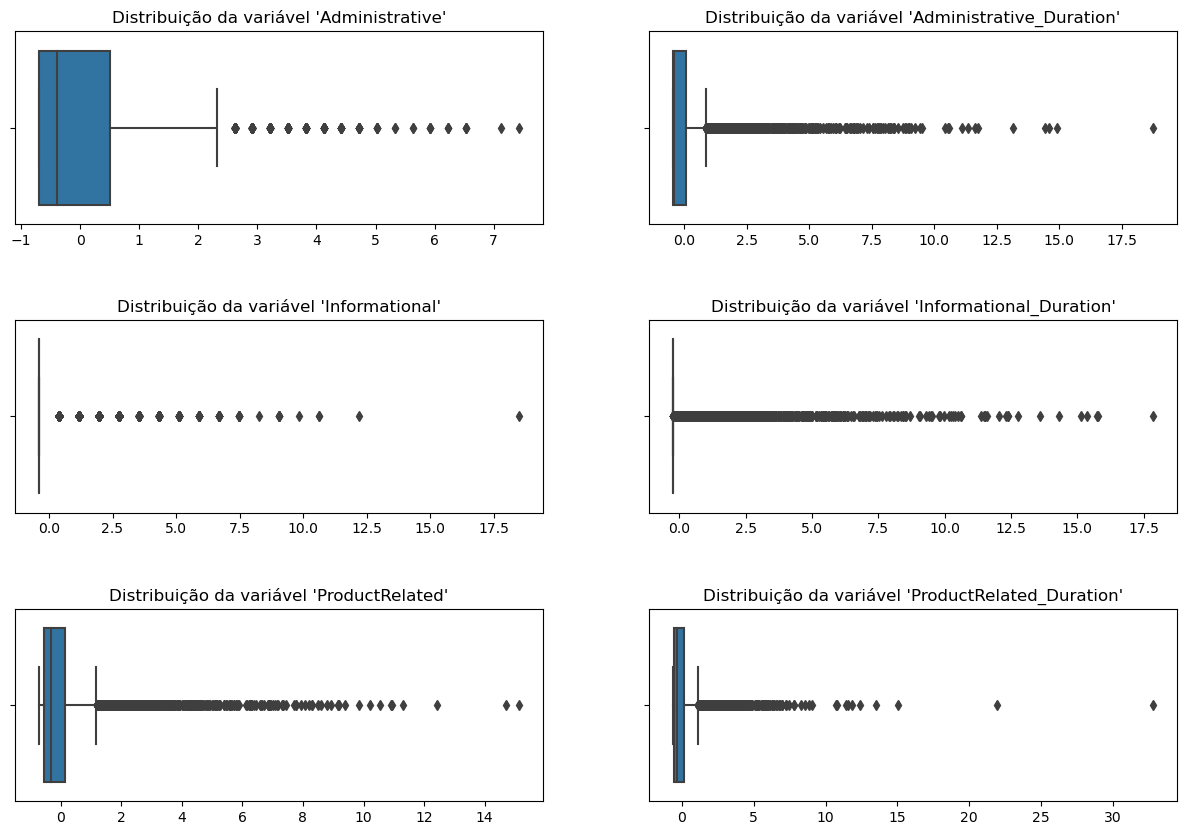

In [42]:
figura, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15,10))

ax1.set_title("Distribuição da variável 'Administrative'")
sns.boxplot(data = x_pad, x = 'Administrative', ax = ax1)
ax1.set_xlabel('')

ax2.set_title("Distribuição da variável 'Administrative_Duration'")
sns.boxplot(data = x_pad, x = 'Administrative_Duration', ax = ax2)
ax2.set_xlabel('')

ax3.set_title("Distribuição da variável 'Informational'")
sns.boxplot(data = x_pad, x = 'Informational', ax = ax3)
ax3.set_xlabel('')

ax4.set_title("Distribuição da variável 'Informational_Duration'")          
sns.boxplot(data = x_pad, x = 'Informational_Duration', ax = ax4)
ax4.set_xlabel('')

ax5.set_title("Distribuição da variável 'ProductRelated'")      
sns.boxplot(data = x_pad, x = 'ProductRelated', ax = ax5)
ax5.set_xlabel('')

ax6.set_title("Distribuição da variável 'ProductRelated_Duration'")
sns.boxplot(data = x_pad, x = 'ProductRelated_Duration', ax = ax6)
ax6.set_xlabel('')

plt.subplots_adjust(hspace=0.5)

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

Obs: utilizarei o método do cotovelo para avaliar um bom número de clusters a serem usados

In [50]:
# Lista vazia para as somas dos quadrados das distancias
SQD = []

# Lista com o número de clusters
num_clusters = list(range(1,16))

# Para cada numero de clusters, crio um KMens e guardo a soma dos quadrados das distancias
for num in num_clusters:
    
    km = KMeans(n_clusters = num, n_init = 10).fit(x_pad)
    
    SQD.append( km.inertia_  )
    

**Avalio gráficamente a partir de qual número de clusters a linha tem uma "curva" acentuada**

Podemos conferir que o melhor número ficaria por volta de 2, 3 ou 4 grupos. Pois maior que isso, é praticamente uma descida constante.

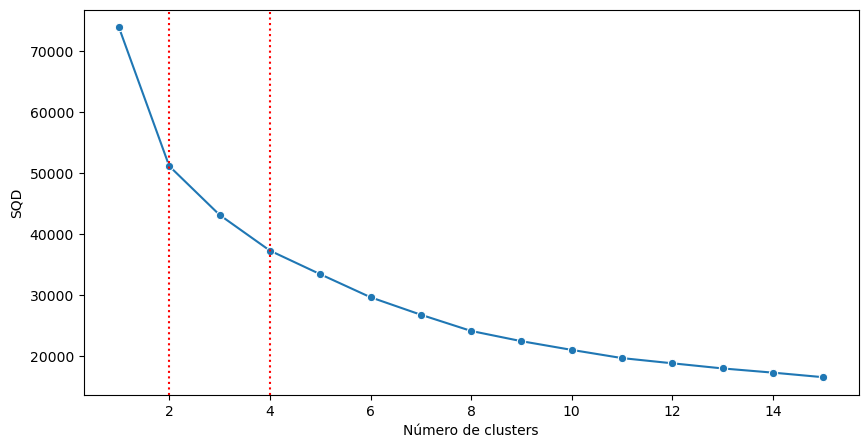

In [63]:
figura, ax = plt.subplots(1, 1, figsize = (10,5))

sns.lineplot(x = num_clusters, y = SQD, marker='o', ax = ax)

ax.set_xlabel('Número de clusters')
ax.set_ylabel('SQD')

ax.axvline(x = 2, color = 'red', linestyle=':')
#ax.axvline(x = 3, color = 'red', linestyle=':')
ax.axvline(x = 4, color = 'red', linestyle=':')

plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

**Agrupamento com 2 clusters:**

Ao rodar o modelo agrupando em dois grupos, podemos notar um grupo 0, que está concentrado em indivíduos que acessam uma grande quantidade de páginas de qualquer tipo por um tempo maior, e um grupo 1, que acessa as páginas em menor quantidade e por um tempo menor.

O que dá a entender, que o modelo não clasificou os grupos de acordo com a preferencia de qual tipo de páginas acessam, mas sim, em um grupo que acessa bastante páginas por uma longa duração, e um grupo que acessa poucas páginas por uma duração de tempo menor.

In [90]:
x_pad = x_pad[variaveis].copy()

km = KMeans(n_clusters = 2, n_init = 10).fit(x_pad)

x_pad['grupo_2'] = km.labels_

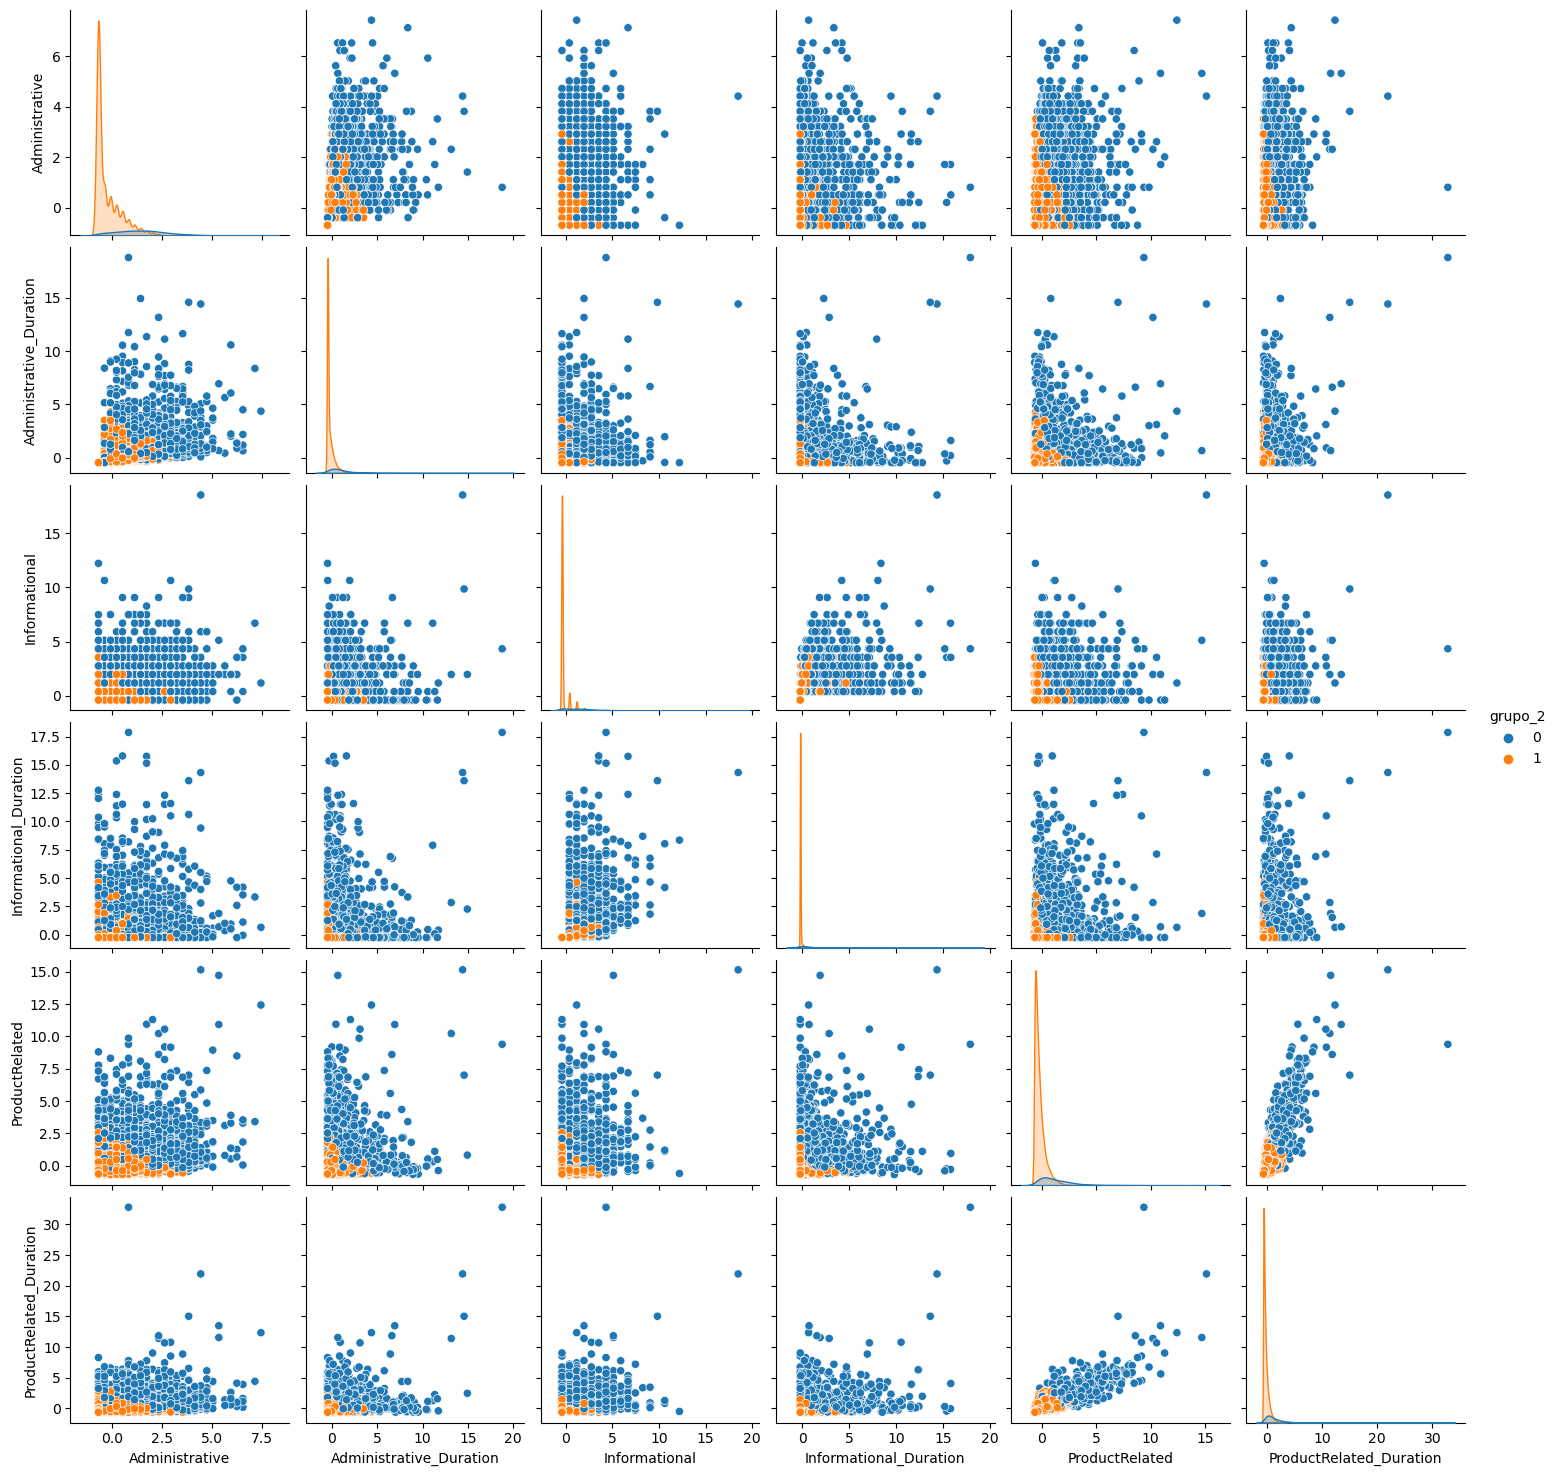

In [87]:
sns.pairplot(x_pad, hue = 'grupo_2', diag_kind="kde")

**Agrupamento com 3 clusters:**

Rodando o modelo agrupando em 3 grupos, já pode-se notar que ele minimamente fez uma separação dos grupos de acordo com o tipo de página acessada, o que dá a entender que é um grupo para páginas administrativas, um para páginas informacionais e um para página de produtos.

In [109]:
x_pad = x_pad[variaveis].copy()

km = KMeans(n_clusters = 3, n_init = 10).fit(x_pad)

x_pad['grupo_3'] = km.labels_

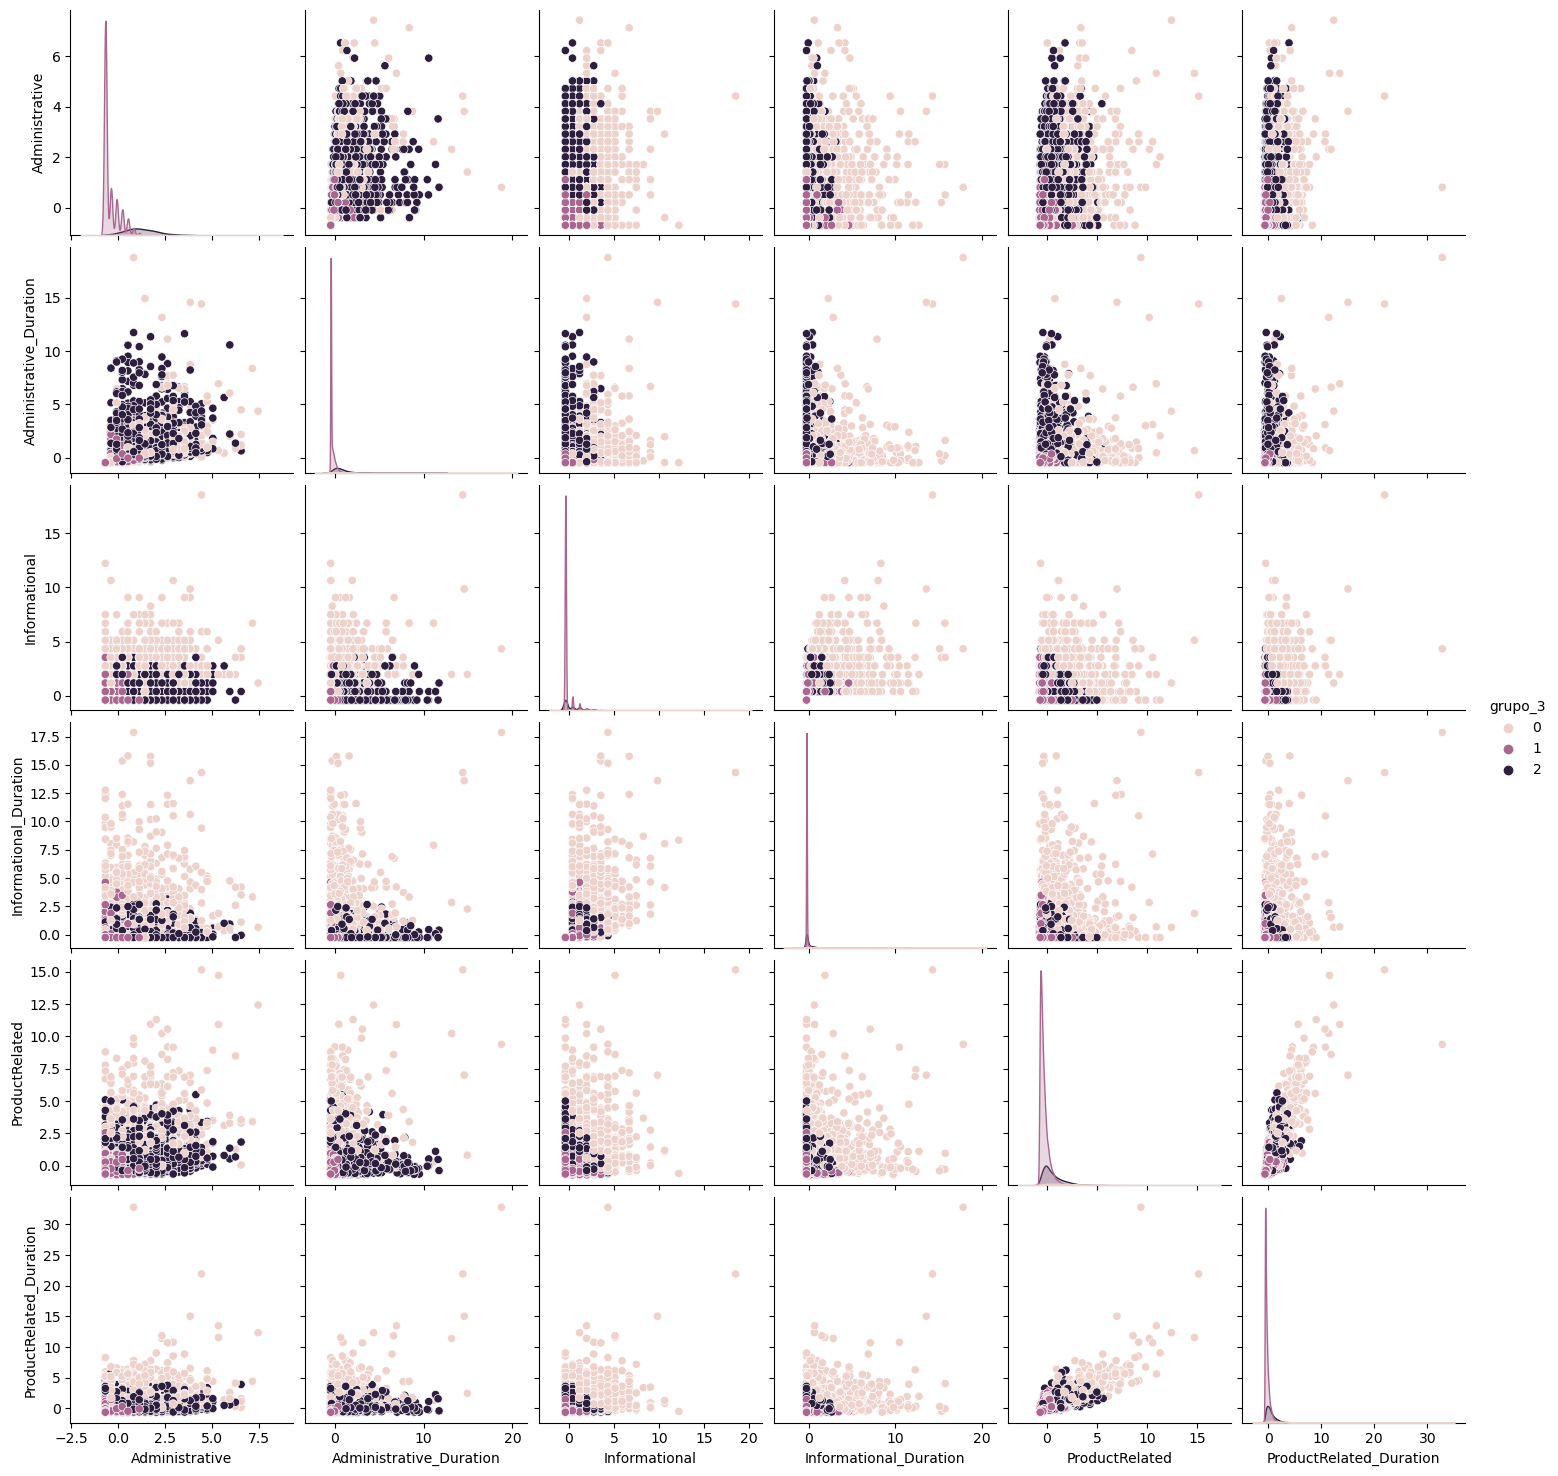

In [98]:
sns.pairplot(x_pad, hue = 'grupo_3')

plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

O algoritmo classificou mais dados como grupo_0, mas em termos percentuais, dados classificados no grupo_1 são mais propensos a comprar.

In [110]:
x_pad['Revenue'] = df['Revenue']
x_pad['BounceRates'] = df['BounceRates']

x_pad.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,grupo_3,Revenue,BounceRates
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0,False,0.20
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,0,False,0.00
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0,False,0.20
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0,False,0.05
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,0,False,0.02


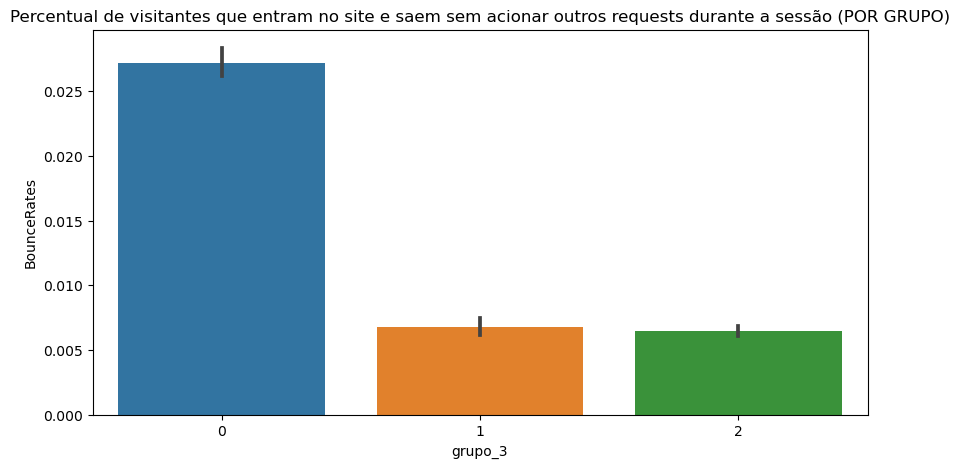

In [122]:
figura, ax = plt.subplots(1, 1, figsize=(10,5))

sns.barplot(data = x_pad, y = 'BounceRates', x = 'grupo_3', ax = ax)

ax.set_title("Percentual de visitantes que entram no site e saem sem acionar outros requests durante a sessão (POR GRUPO)")

plt.show()

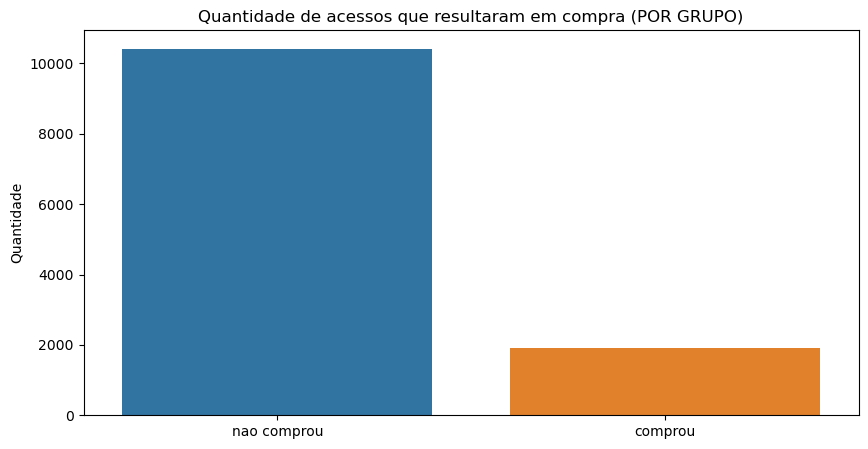

In [143]:
figura, ax = plt.subplots(1, 1, figsize=(10,5))

sns.countplot(data = x_pad, x = 'Revenue', ax = ax)

ax.set_xticklabels(['nao comprou', 'comprou'])
ax.set_xlabel('')
ax.set_ylabel('Quantidade')

ax.set_title('Quantidade de acessos que resultaram em compra (POR GRUPO)')

plt.show()

In [171]:
tot_grupo_0 = len(x_pad[ x_pad['grupo_3'] == 0  ])
tot_grupo_1 = len(x_pad[ x_pad['grupo_3'] == 1  ])
tot_grupo_2 = len(x_pad[ x_pad['grupo_3'] == 2  ])

qtde_comprou_g0 = len(x_pad[ (x_pad['grupo_3'] == 0) & (x_pad['Revenue'] == True)  ]) / tot_grupo_0 * 100
qtde_comprou_g1 = len(x_pad[ (x_pad['grupo_3'] == 1) & (x_pad['Revenue'] == True)  ]) / tot_grupo_1 * 100
qtde_comprou_g2 = len(x_pad[ (x_pad['grupo_3'] == 2) & (x_pad['Revenue'] == True)  ]) / tot_grupo_2 * 100

print('---------------------------------------------')
print("Dados classficados como grupo_0: ")
print(f"Qtde total   : {tot_grupo_0}")
print(f"% que comprou: {round(qtde_comprou_g0, 2)}%")
print('---------------------------------------------')
print("Dados classficados como grupo_1: ")
print(f"Qtde total   : {tot_grupo_1}")
print(f"% que comprou: {round(qtde_comprou_g1, 2)}%")
print('---------------------------------------------')
print("Dados classficados como grupo_2: ")
print(f"Qtde total   : {tot_grupo_2}")
print(f"% que comprou: {round(qtde_comprou_g2, 2)}%")
print('---------------------------------------------')

---------------------------------------------
Dados classficados como grupo_0: 
Qtde total   : 9346
% que comprou: 12.54%
---------------------------------------------
Dados classficados como grupo_1: 
Qtde total   : 541
% que comprou: 30.31%
---------------------------------------------
Dados classficados como grupo_2: 
Qtde total   : 2443
% que comprou: 23.41%
---------------------------------------------
